# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Analysis:
1. Weather becomes warmer as we approach the equater. From the plot, the northern hemispher seems to be slightly warmer. 
2. There is not much relationship between latitude and wind speed.
3. There is not much relationship between latitude and cloudiness.
4. There is not much relationship between latitude and humidity.

In [19]:
# Dependencies and Setup
# Dependencies and Setup
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
 new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [9]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | chandur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 2 of set 0 | barrow
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 3 of set 0 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 4 of set 0 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 5 of set 0 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 6 of set 0 | abu jubayhah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
City not found!
Processing record 7 of set 0 | lompoc
http://api.openweather

Processing record 7 of set 1 | chiredzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 8 of set 1 | caucaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 9 of set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 10 of set 1 | geraldton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 11 of set 1 | xiongyue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 12 of set 1 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 13 of set 1 | algiers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Proce

Processing record 15 of set 2 | batagay-alyta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 16 of set 2 | dinsor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
City not found!
Processing record 17 of set 2 | dubuque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 18 of set 2 | waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 19 of set 2 | helensburgh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 20 of set 2 | sitka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 21 of set 2 | smoky lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b2

Processing record 21 of set 3 | monrovia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 22 of set 3 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 23 of set 3 | rio cuarto
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 24 of set 3 | basco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 25 of set 3 | lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 26 of set 3 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 27 of set 3 | poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing 

Processing record 28 of set 4 | airai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 29 of set 4 | penzance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 30 of set 4 | la asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 31 of set 4 | cavalcante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 32 of set 4 | khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 33 of set 4 | mount gambier
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 34 of set 4 | svetlyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Pro

Processing record 35 of set 5 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
City not found!
Processing record 36 of set 5 | luau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 37 of set 5 | raga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 38 of set 5 | ilulissat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 39 of set 5 | dzhebariki-khaya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 40 of set 5 | college place
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 41 of set 5 | flin flon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c9

Processing record 42 of set 6 | abu zabad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 43 of set 6 | bayburt
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 44 of set 6 | nong ki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 45 of set 6 | yashkino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 46 of set 6 | deputatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 47 of set 6 | juxtlahuaca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 48 of set 6 | kumphawapi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0

Processing record 48 of set 7 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 49 of set 7 | tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 50 of set 7 | bone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 0 of set 8 | altea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 1 of set 8 | huasahuasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 2 of set 8 | karoi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 3 of set 8 | artyom
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 4

Processing record 4 of set 9 | mogadishu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 5 of set 9 | limoges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 6 of set 9 | umm lajj
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 7 of set 9 | pedasi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 8 of set 9 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 9 of set 9 | dianopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
City not found!
Processing record 10 of set 9 | pierre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146

Processing record 11 of set 10 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 12 of set 10 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 13 of set 10 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 14 of set 10 | arua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 15 of set 10 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 16 of set 10 | makaha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 17 of set 10 | borgo san dalmazzo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0


Processing record 18 of set 11 | sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 19 of set 11 | afanasyevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
City not found!
Processing record 20 of set 11 | vostok
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 21 of set 11 | venice
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 22 of set 11 | kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 23 of set 11 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 24 of set 11 | santiago
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f

Processing record 25 of set 12 | ballina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 26 of set 12 | kargil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
Processing record 27 of set 12 | humenne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3e1908276f65b96c924b206f146ddff0
-------------------------
Data Retrieval Complete
-------------------------


In [13]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          584
Cloudiness    584
Country       584
Date          584
Humidity      584
Temp          584
Lat           584
Lng           584
Wind Speed    584
dtype: int64

In [14]:
 weather_data.head()


,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,chandur,0,IN,1584842807,17,82.33,19.73,79.18,1.34
1,barrow,90,US,1584842807,77,5.00,71.29,-156.79,16.11
2,harper,50,LR,1584842808,92,76.57,4.38,-7.72,2.13
3,castro,42,BR,1584842808,98,60.01,-24.79,-50.01,8.30
4,saint-augustin,100,CA,1584842808,77,8.89,51.23,-58.65,16.33


In [17]:
cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

In [20]:
date =datetime.datetime.fromtimestamp(
        int(weather_data['Date'][0])
    ).strftime('%m/%d/%Y')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

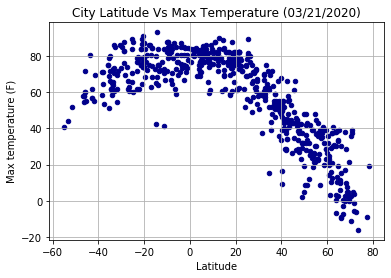

In [21]:
# Latitude Vs Temperature Plot

weather_data.plot(kind='scatter', x='Lat', y='Temp', c='DarkBlue')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")

#### Latitude vs. Humidity Plot

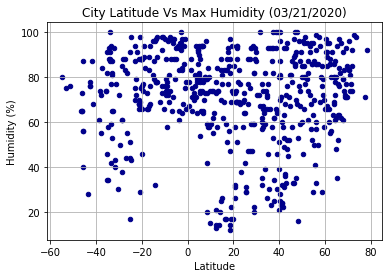

In [23]:

# Latitude Vs Humidity

weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

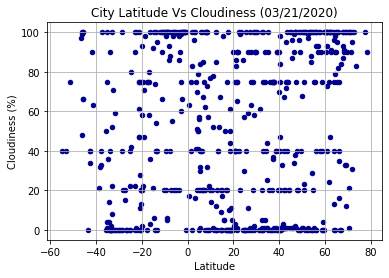

In [24]:
# Latitude Vs Cloudiness

weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

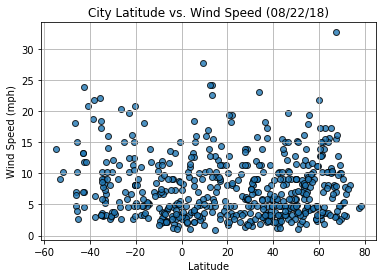